In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
from natsort import index_natsorted

In [2]:
!pip install pycountry


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 3.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=f42dc54f0d48949acc8416555a3c84c6015514cdfc3152d0d38d13decb4ebf3d
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
import folium 
from folium import plugins

In [4]:
from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [5]:
%config InlineBackend.figure_format = 'retina' 

In [6]:
plt.rcParams['figure.figsize'] = 8, 5
import warnings
warnings.filterwarnings('ignore')
import os

In [7]:
df = pd.read_csv('forbes.csv')
df.head()



S.NO               Name Nationality  Current Rank Previous Year Rank  \
0     1         Mike Tyson         USA             1                NaN   
1     2     Buster Douglas         USA             2                NaN   
2     3  Sugar Ray Leonard         USA             3                NaN   
3     4       Ayrton Senna      Brazil             4                NaN   
4     5        Alain Prost      France             5                NaN   

         Sport  Year  earnings ($ million)  
0       boxing  1990                  28.6  
1       boxing  1990                  26.0  
2       boxing  1990                  13.0  
3  auto racing  1990                  10.0  
4  auto racing  1990                   9.0

In [8]:
df1 = df.copy()
df1.drop('S.NO',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [9]:
# Convert string to datetime64
df1['Year'] = df1['Year'].apply(pd.to_datetime,format='%Y')

#Set Date column as the index column.
df1['year'] = pd.DatetimeIndex(df1['Year']).year  
df1.set_index('year', inplace=True)
df1.drop('Year',axis=1,inplace=True)

# Converting the sport column to uppercase
df1['Sport'] = df1['Sport'].str.upper()
df1.head()

# df is the original dataframe while df1 is a copy where the Date has been set as an index column

Name Nationality  Current Rank Previous Year Rank  \
year                                                                   
1990         Mike Tyson         USA             1                NaN   
1990     Buster Douglas         USA             2                NaN   
1990  Sugar Ray Leonard         USA             3                NaN   
1990       Ayrton Senna      Brazil             4                NaN   
1990        Alain Prost      France             5                NaN   

            Sport  earnings ($ million)  
year                                     
1990       BOXING                  28.6  
1990       BOXING                  26.0  
1990       BOXING                  13.0  
1990  AUTO RACING                  10.0  
1990  AUTO RACING                   9.0

In [10]:
data_2020 = df1[df1.index == 2020]

trace = go.Bar(
                    x = data_2020["earnings ($ million)"],
                    y = data_2020['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="World's Highest-Paid Athletes in 2020",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [11]:
# Top Paid Athlete for Each Year
Top_paid_each_year = df1[df1['Current Rank'] == 1].sort_values(by='year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]

z.style.background_gradient(cmap='Reds')  

In [12]:
counts_top = Top_paid_each_year['Name'].value_counts().to_frame()


trace = go.Bar(
                    y = counts_top.index,
                    x = counts_top['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Athlete earning the most,maximum number of times',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [13]:
total_earnings = Top_paid_each_year.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = Top_paid_each_year['Name'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare = total_earnings.merge(top_ranks, on='Name')

In [14]:
#source: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners#Bar-Charts

import plotly.graph_objs as go
from plotly import tools
trace0 = go.Bar(
                y=df_compare['Name'],
                x=df_compare['Rank_counts'],
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='Top Ranks',
                orientation='h',
)

trace1 = go.Scatter(
                y=df_compare['Name'],
                x=df_compare['earnings ($ million)'],
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)

layout = dict(
                title='Income and Top Ranks',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=False,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
y_s = df_compare['Rank_counts']
y_nw = np.rint(df_compare['earnings ($ million)'])
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, df_compare['Name']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn-1,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd+1,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
fig.show()

In [15]:
counts_top = Top_paid_each_year['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    x = counts_top.index,
                    y = counts_top['Nationality'] ,
                    orientation='v',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which produces the maximum earners in Sports',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [16]:
trace = go.Scatter(
                    x = Top_paid_each_year.index,
                    y = Top_paid_each_year['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='royalblue',width=2)),
                    )
data = [trace]
layout = go.Layout(title='How much did the Top Paid Athlete for Each Year, earn? ',width=800, height=500, 
                       xaxis= dict(title='Years'),
                       yaxis=dict(title="Earning in US Dollars(million)"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [17]:
df['Sport'] = df['Sport'].str.upper() # Converting the text to uppercase
max_sport = df['Sport'].value_counts().to_frame()

trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Sport'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Sport which dominates in earnings',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [18]:
max_sport = df['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Nationality'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which dominates in Sports earningss',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [19]:
s = df['Name'].value_counts().to_frame()[:5]
s.style.background_gradient(cmap='Reds')  

In [20]:
# People who have appeared once on the list.
names = df['Name'].value_counts().to_frame()
names[names['Name']==1].index

# On scanning the list, we find the name of a sole women athlete- monica seles
monica = df[df['Name'] == 'Monica Seles']
monica.style.set_properties(**{'background-color': 'pink',
                            'color': 'black',
                            'border-color': 'black'})

In [21]:
top_earners_alltime = pd.pivot_table(df, index='Name',values="earnings ($ million)", aggfunc='sum')
top3_earners_all = top_earners_alltime.sort_values(by="earnings ($ million)",ascending=False)[:3]

top3_earners_all.style.background_gradient(cmap='Reds')  

In [22]:
def earnings_plot(dataframe,athlete,image_path,opacity):
    """
    function that creates a plotly line chart with image of the athlete in the background
    
    
    """
    athlete_df = df1[df1['Name'] == athlete]

    trace = go.Scatter(
                    x = athlete_df.index,
                    y = athlete_df['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='red',width=6)),
                    )
    data = [trace]
    layout= go.Layout(title= f'{athlete}' +"'s earnings over the Years",
                  xaxis=dict(title='Year'),
                  yaxis=dict(title="Earnings in US$ (millions)"),
                  images= [dict(
                          source=Image.open(image_path),
                          xref= "paper",
                          yref= "paper",
                          x= 0.5,
                          y= 0.5,
                          sizex= 1,
                          sizey= 1,
                          sizing= "stretch",
                          opacity= opacity,
                          xanchor= "center", 
                          yanchor="middle",
                          layer= "below")])
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)


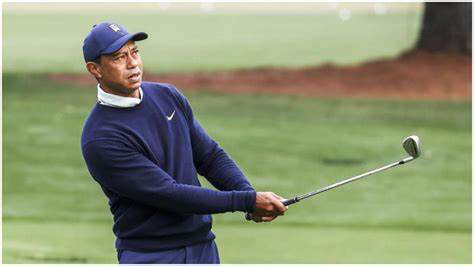

In [23]:
image_path = "tiger_woods.jpg"
earnings_plot(df1,'Tiger Woods',image_path,opacity=0.3)


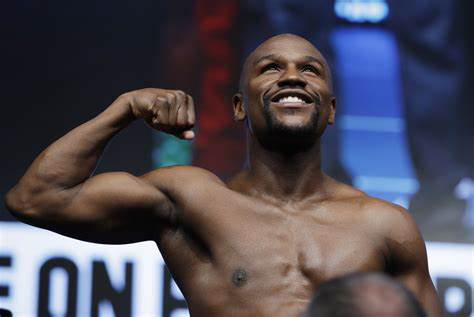

In [24]:
image_path = "floyd.jpg"
earnings_plot(df1,'Floyd Mayweather',image_path,opacity=0.2)


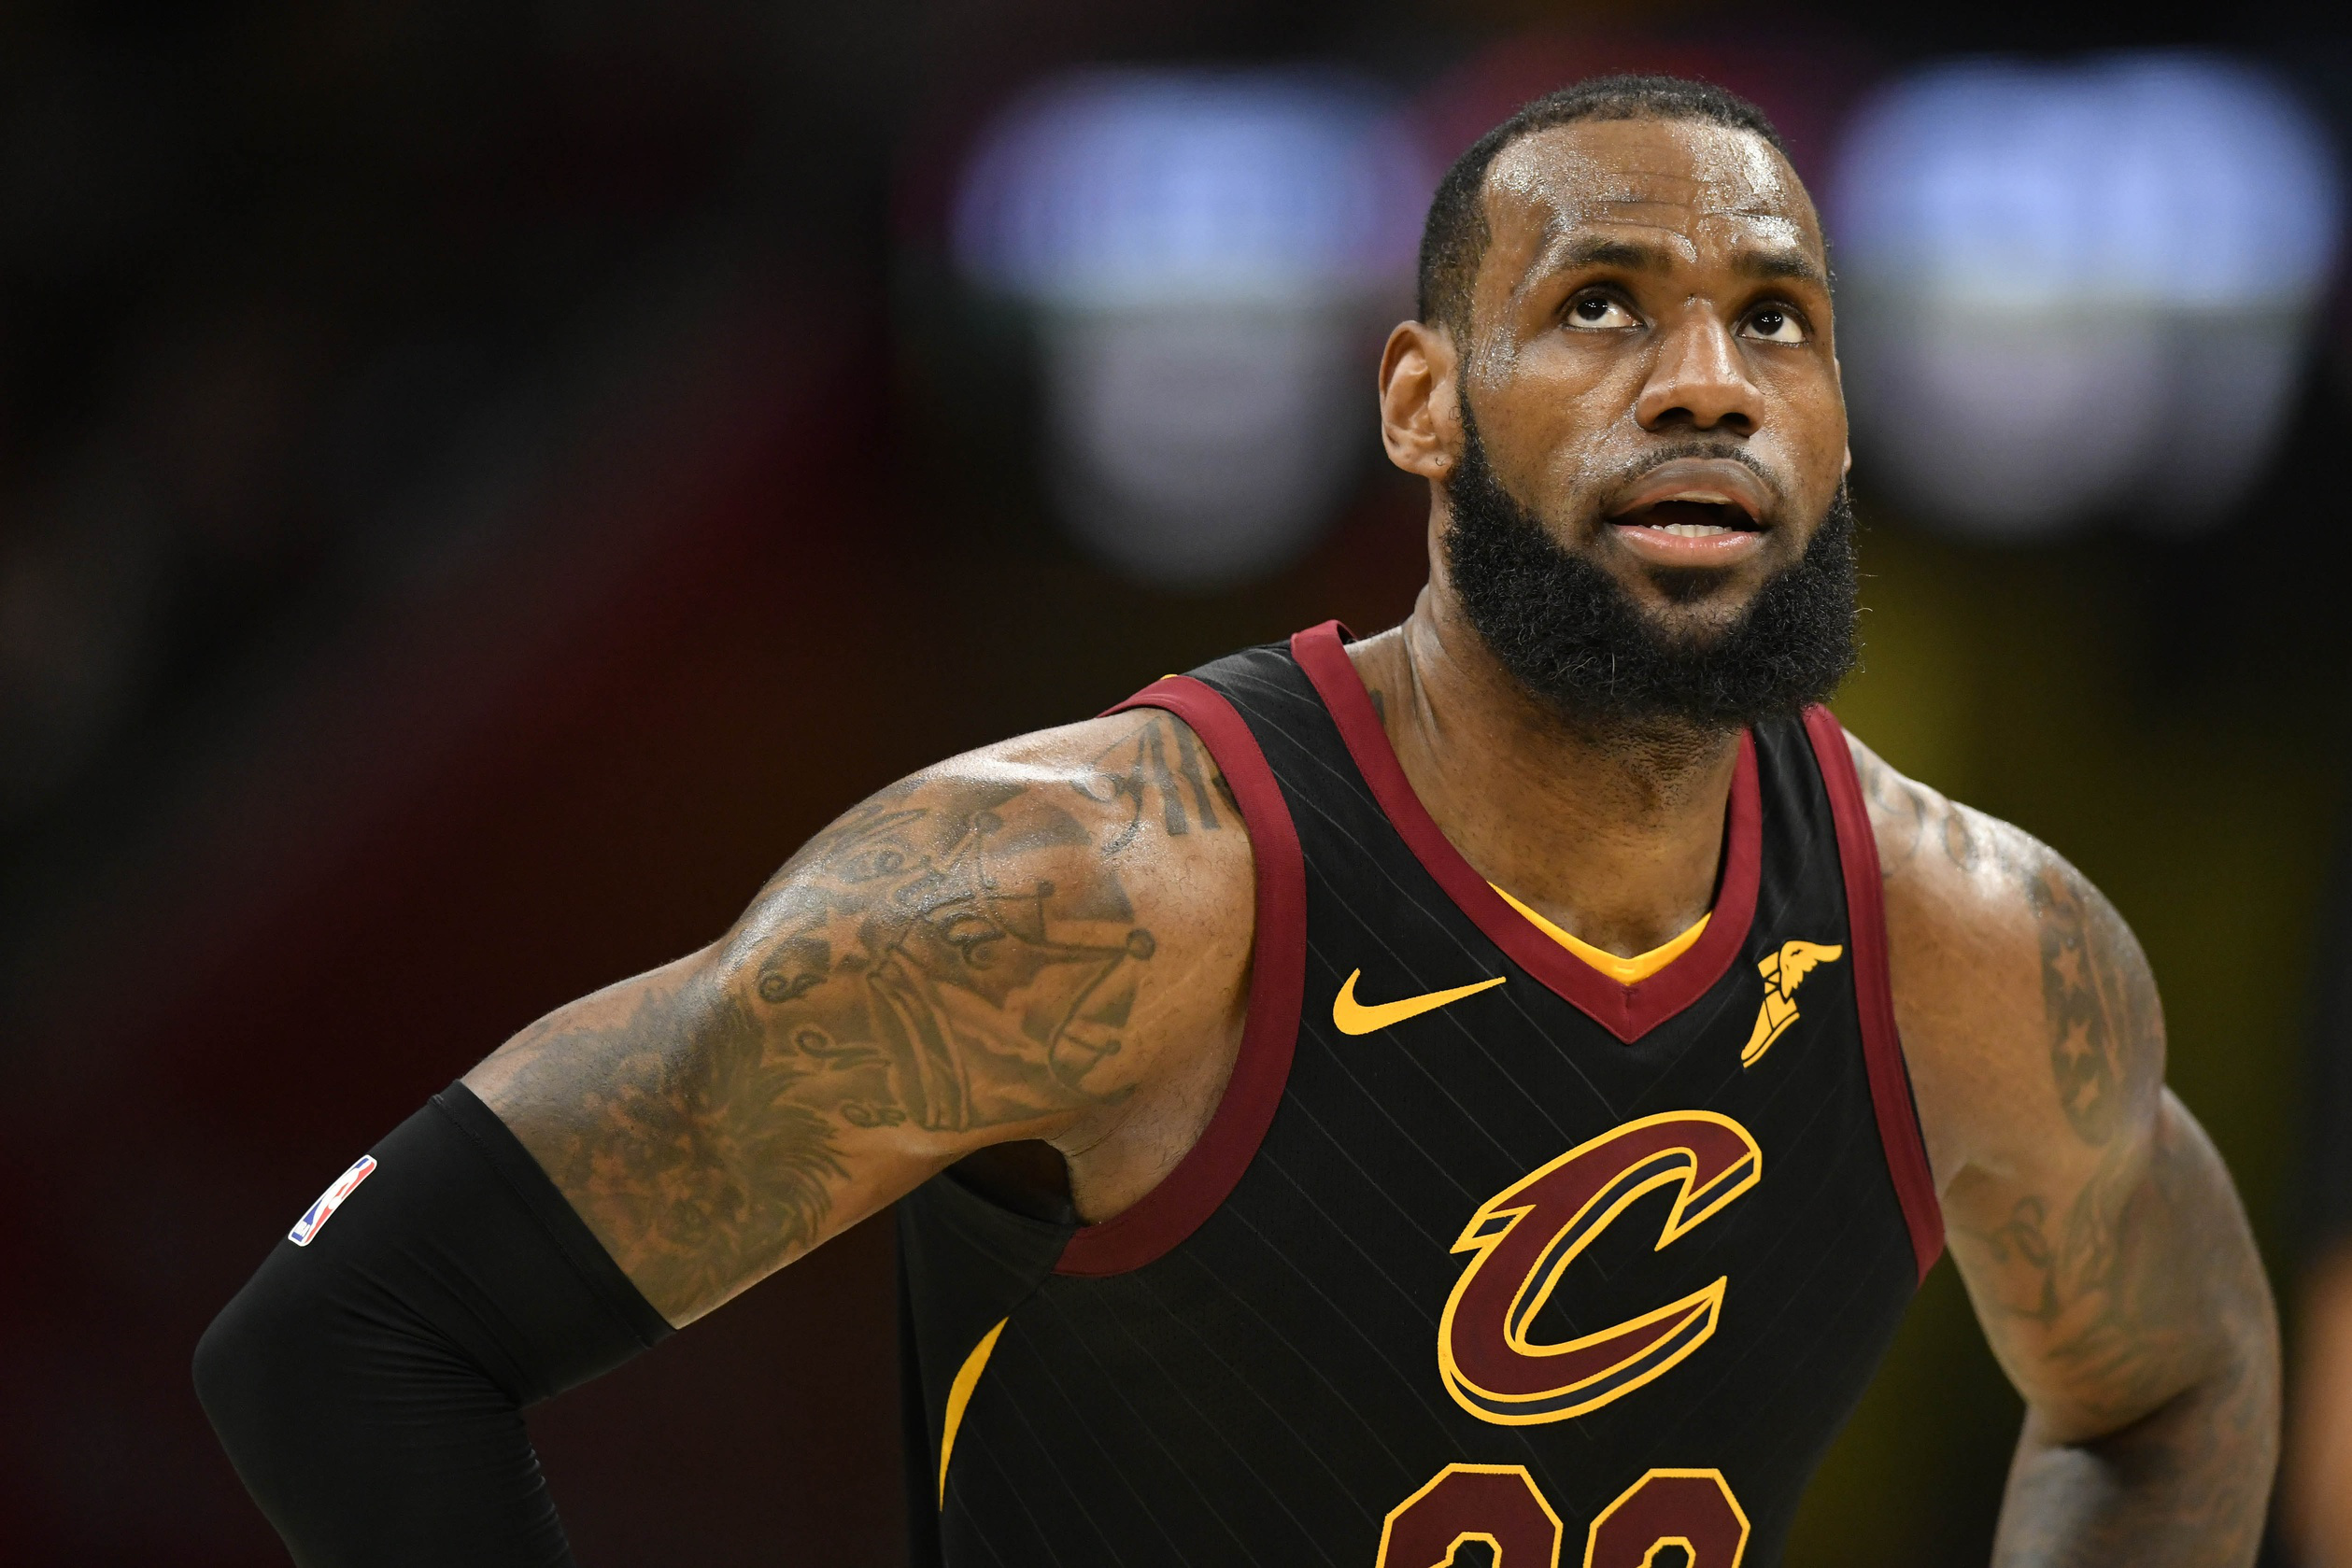

In [25]:
image_path = "lebron.jpg"
earnings_plot(df1,'LeBron James',image_path,opacity=0.2)

## ¡Es tu momento de brillar🚀! Pregunta 1
Deportistas cuyo ranking ha subido al menos dos lugares 
entre 2010 y 2020.

In [80]:
dfp1   = df[["Name", 
         "Current Rank",
         "Previous Year Rank",
         "Year",]]
dfp1 = dfp1.sort_values(ascending=True, by=["Name", 
         "Current Rank",
         "Previous Year Rank",
         "Year",])
dfp1.rename(columns = {"Current Rank": "Rank", 'Previous Year Rank': "Previous"}, inplace = True)
dfp1.head(20)

Name  Rank Previous  Year
226   Aaron Rodgers     6        ?  2013
287    Aaron Rogers     7       ??  2019
33      Alain Prost     4      >40  1993
4       Alain Prost     5      NaN  1990
15      Alain Prost     6        5  1991
127  Alex Rodriguez     7      >10  2003
208  Alex Rodriguez     8       12  2011
139  Alex Rodriguez     9        7  2004
159  Alex Rodriguez     9      >10  2006
25     Andre Agassi     6       17  1992
66     Andre Agassi     7        7  1996
56     Andre Agassi     7        9  1995
137    Andre Agassi     7        9  2004
48     Andre Agassi     9       20  1994
129    Andre Agassi     9      >10  2003
266     Andrew Luck     6      NaN  2017
43    Arnold Palmer     4       11  1994
24    Arnold Palmer     5        8  1992
67    Arnold Palmer     8       11  1996
17    Arnold Palmer     8        8  1991

In [103]:
#df = df.sort_values(['column1', 'column2'], ascending=(False, True))  
dfp1 = dfp1[dfp1['Year'] >= 2010].loc[:, ("Name", "Rank", 'Previous', 'Year')]
dfp1 = dfp1.sort_values(["Year", "Rank"], ascending=(False, False))
pd.suben_ranking = []
pd.no_ranking = []
dfp1

Name  Rank Previous  Year
300      Carson Wentz    10     >100  2020
299      Kirk Cousins     9     >100  2020
298       Tiger Woods     8       11  2020
297      Kevin Durant     7       10  2020
296     Stephen Curry     6        9  2020
..                ...   ...      ...   ...
195     David Beckham     5        5  2010
194    Phil Mickelson     4        6  2010
193       Kobe Bryant     3        2  2010
192  Floyd Mayweather     2      >10  2010
191       Tiger Woods     1        1  2010

[110 rows x 4 columns]

In [114]:
dfp1_woods = dfp1[dfp1.Name.str.contains("Woods")]

In [117]:
dfp1_woods.min()

Name        Tiger Woods
Rank                  1
Previous              1
Year               2010
dtype: object

In [119]:
print(dfp1_woods.max().sub(dfp1_woods.min()))

TypeError: ignored

In [102]:
#my_data=my_data[my_data.my_class.str.contains('Three')]
#print(my_data.mark.max())

#print(dfp1[dfp1['Name'].str.contains('Woods', regex=False)])
while dfp1_woods.Rank.min() < dfp1_woods.max():
  if i =+ 2 True:
    insert(suben_ranking)
    else:
      insert(no_ranking)
  


SyntaxError: ignored

In [100]:
dfp1_woods.count(axis = 0)

Name        7
Rank        7
Previous    7
Year        7
dtype: int64

## Pregunta 2
Atleta con el menor número de apariciones y mayores ganancias.

In [38]:
top_top   = Top_paid_each_year[["Name", 
         "Current Rank",
         "Previous Year Rank", "earnings ($ million)"]]
top_top = top_top.sort_values(ascending=True, by=["Name", 
         "Current Rank",
         "Previous Year Rank", "earnings ($ million)"])
top_top

Name  Current Rank Previous Year Rank  \
year                                                        
2017   Cristiano Ronaldo             1                  1   
2016   Cristiano Ronaldo             1                  3   
1991   Evander Holyfield             1                  8   
2015    Floyd Mayweather             1                  1   
2014    Floyd Mayweather             1                 14   
2018    Floyd Mayweather             1               >100   
2012    Floyd Mayweather             1                  ?   
2019        Lionel Messi             1                  2   
1994      Michael Jordan             1                  1   
1993      Michael Jordan             1                  1   
1995      Michael Jordan             1                  1   
1997      Michael Jordan             1                  2   
1992      Michael Jordan             1                  3   
1998      Michael Jordan             1                NaN   
2000  Michael Schumacher             1                  1   
1999  Michael Schumacher             1                  2   
1996          Mike Tyson             1                  2   
1990          Mike Tyson             1                NaN   
2020       Roger Federer             1                  5   
2011         Tiger Woods             1                  1   
2003         Tiger Woods             1                  1   
2004         Tiger Woods             1                  1   
2005         Tiger Woods             1                  1   
2006         Tiger Woods             1                  1   
2007         Tiger Woods             1                  1   
2010         Tiger Woods             1                  1   
2009         Tiger Woods             1                  1   
2008         Tiger Woods             1                  1   
2002         Tiger Woods             1                  2   
2013         Tiger Woods             1                  3   

      earnings ($ million)  
year                        
2017                  93.0  
2016                  88.0  
1991                  60.5  
2015                 300.0  
2014                 105.0  
2018                 285.0  
2012                  85.0  
2019                 127.0  
1994                  30.0  
1993                  36.0  
1995                  43.9  
1997                  78.3  
1992                  35.9  
1998                  69.0  
2000                  59.0  
1999                  49.0  
1996                  75.0  
1990                  28.6  
2020                 106.3  
2011                  75.0  
2003                  78.0  
2004                  80.3  
2005                  87.0  
2006                  90.0  
2007                 100.0  
2010                 105.0  
2009                 110.0  
2008                 115.0  
2002                  69.0  
2013                  78.1

In [39]:
#df['Magnitude'].nlargest(n=10)
top_top = Top_paid_each_year["earnings ($ million)"].nlargest()
top_top = Top_paid_each_year['Name'].value_counts()
#top_top = Top_paid_each_year.groupby(["Name"])
top_top


Tiger Woods           11
Michael Jordan         6
Floyd Mayweather       4
Cristiano Ronaldo      2
Michael Schumacher     2
Mike Tyson             2
Roger Federer          1
Lionel Messi           1
Evander Holyfield      1
Name: Name, dtype: int64

In [40]:
#df.drop_duplicates()
top_top.nunique()


5

In [235]:
#df['Magnitude'].nlargest(n=10)
#Top_paid_each_year = df1[df1['Current Rank'] == 1].sort_values(by='year',ascending=False)
#z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]
#z.style.background_gradient(cmap='Reds')  
the_top = Top_paid_each_year['Name'].value_counts().to_frame()


trace = go.Bar(
                    y = the_top.index,
                    x = the_top['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Athlete earning the most,minimum number of times',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Preguna 3
Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.

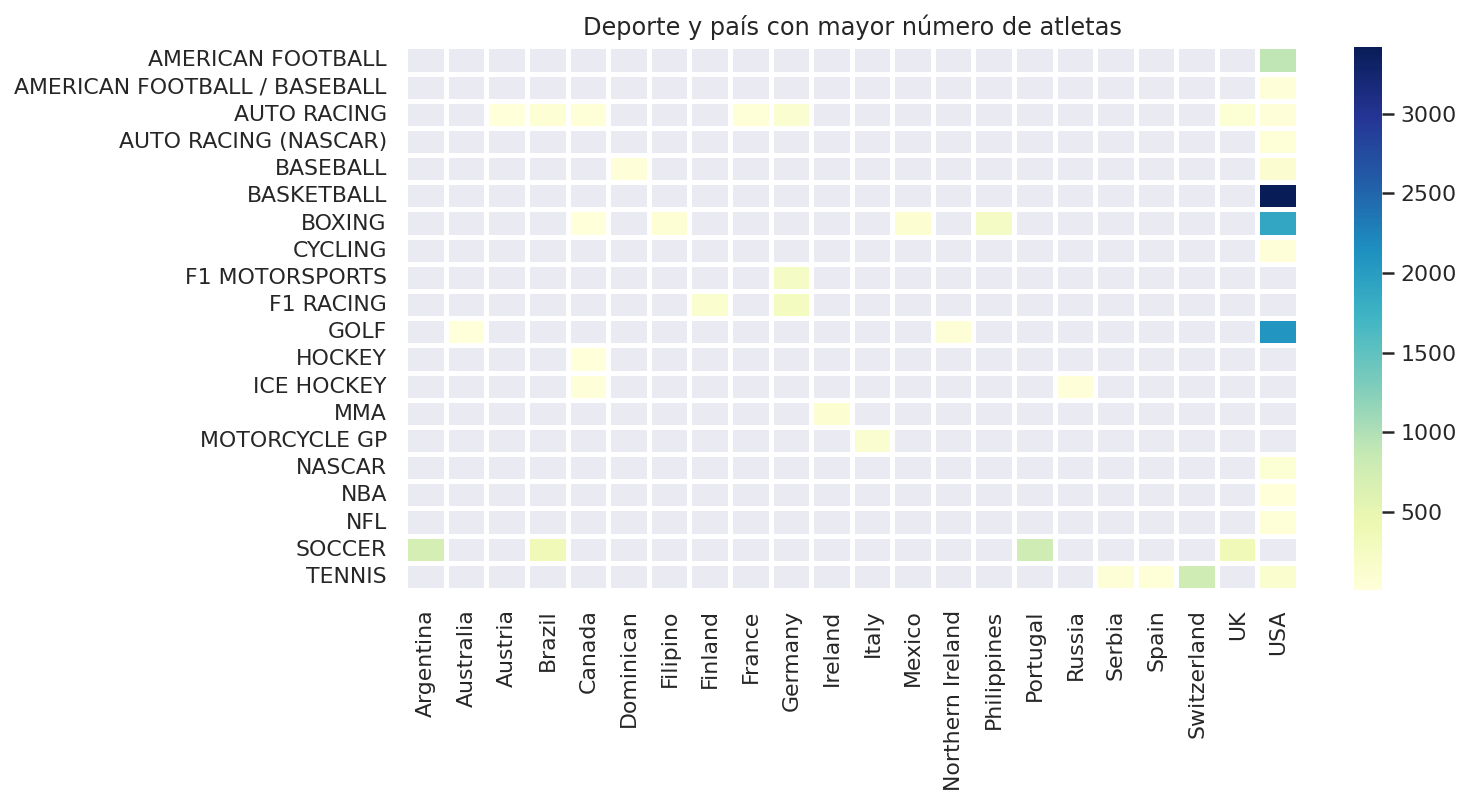

In [ ]:
df["Current Rank"].unique()
df.columns
df_agrupado=df.groupby(["Sport","Nationality"])[['earnings ($ million)']].sum().sort_values('earnings ($ million)', ascending=False)
df_agrupado.reset_index(inplace=True)

df_heatmap=df_agrupado.pivot("Sport","Nationality","earnings ($ million)")

plt.figure(figsize=(10,5))
sns.set()
ax = sns.heatmap(df_heatmap,linewidths=2,cmap="YlGnBu")
plt.title("Deporte y país con mayor número de atletas")
plt.ylabel("")
plt.xlabel("")

plt.show()

# Preguna 4
País con mayor número de deportes con atletas en el dataset.

In [ ]:
df_agrupado=df.groupby(["Nationality"])['earnings ($ million)'].sum().sort_values(ascending=True).to_frame()
df_agrupado.reset_index(inplace=True)
df_agrupado

Nationality  earnings ($ million)
0          Australia                   8.5
1            Austria                  13.5
2             Russia                  29.8
3          Dominican                  35.0
4             France                  36.0
5              Spain                  44.5
6   Northern Ireland                  50.0
7             Serbia                  55.8
8           Filipino                  62.0
9             Mexico                  94.0
10           Ireland                  99.0
11            Canada                  99.1
12             Italy                 128.0
13           Finland                 129.0
14       Philippines                 242.0
15            Brazil                 422.0
16                UK                 443.2
17           Germany                 639.0
18         Argentina                 715.5
19       Switzerland                 781.1
20          Portugal                 787.1
21               USA                8786.3

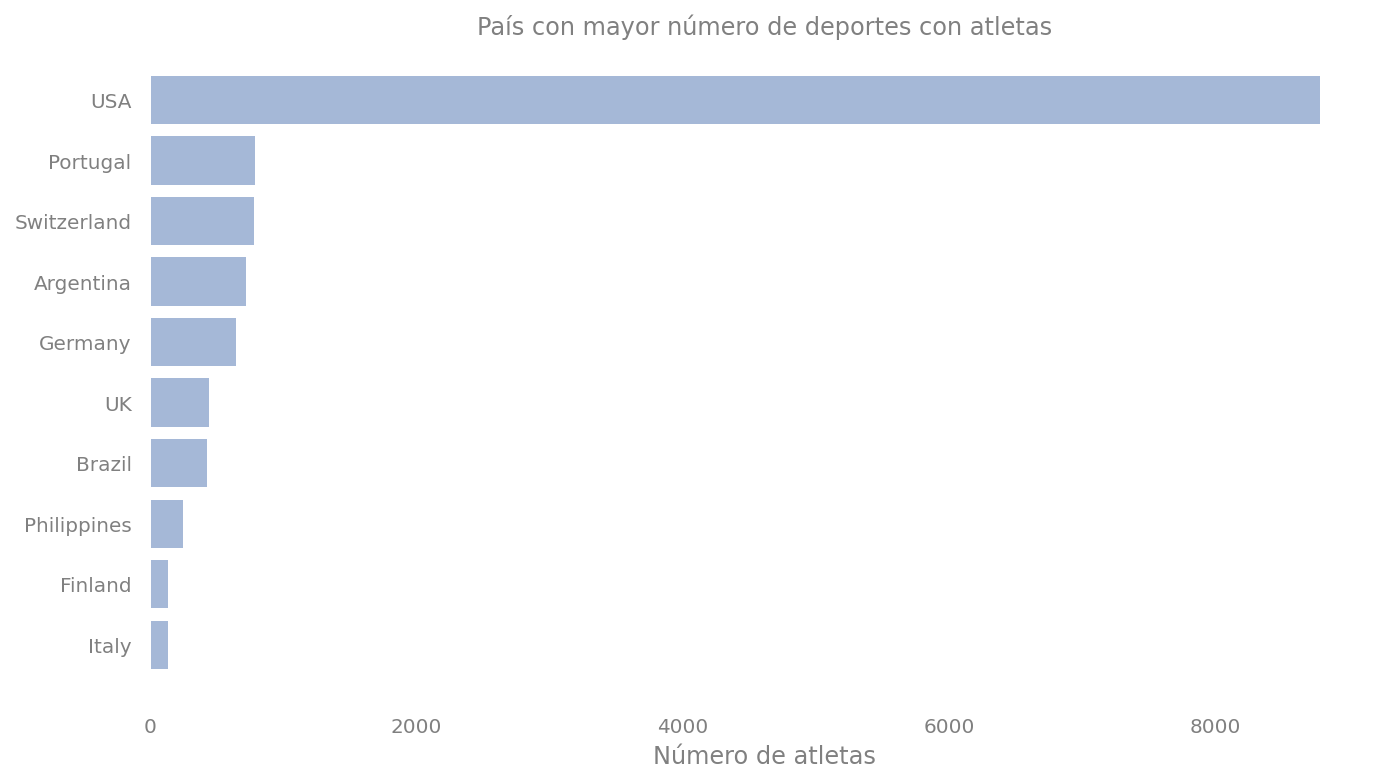

In [ ]:
fig = plt.figure(figsize =(11, 6))
plt.barh(df_agrupado["Nationality"].tail(10), df_agrupado['earnings ($ million)'].tail(10), align='center', alpha=0.5, edgecolor = "none")
plt.box(False)
#Titulos
plt.title("País con mayor número de deportes con atletas", color="#808080")
plt.xlabel("Número de atletas", color="#808080")
#Etiquetas
plt.xticks(fontsize=10, color="#808080")
plt.yticks(fontsize=10, color="#808080")

plt.show()

# Pregunta 5
¿Cuántos atletas por deporte tiene cada país?

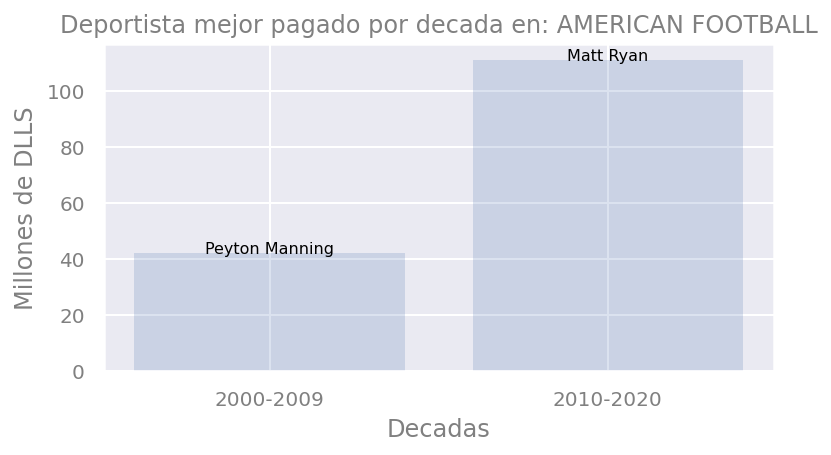

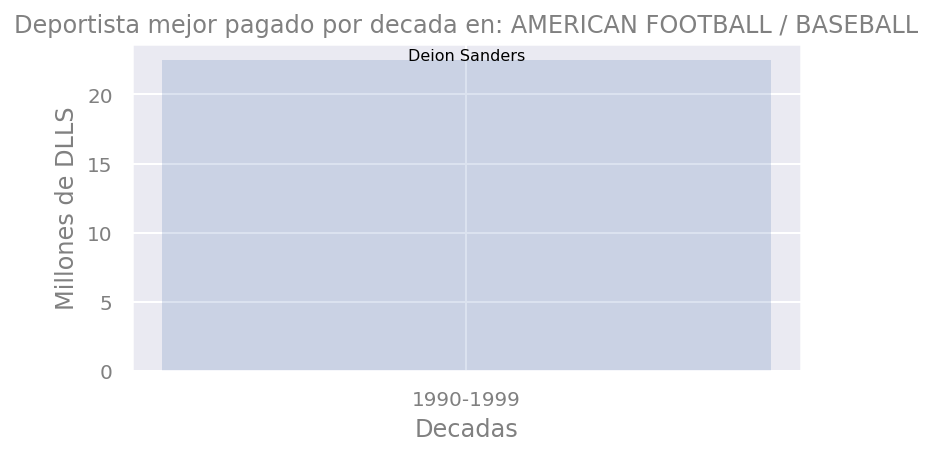

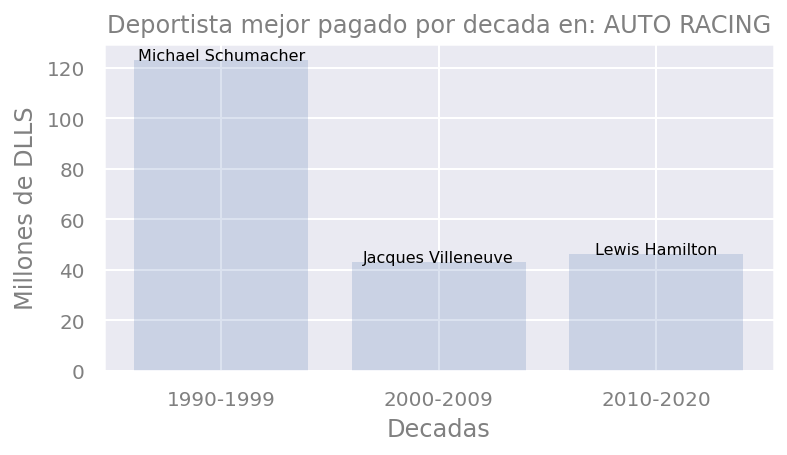

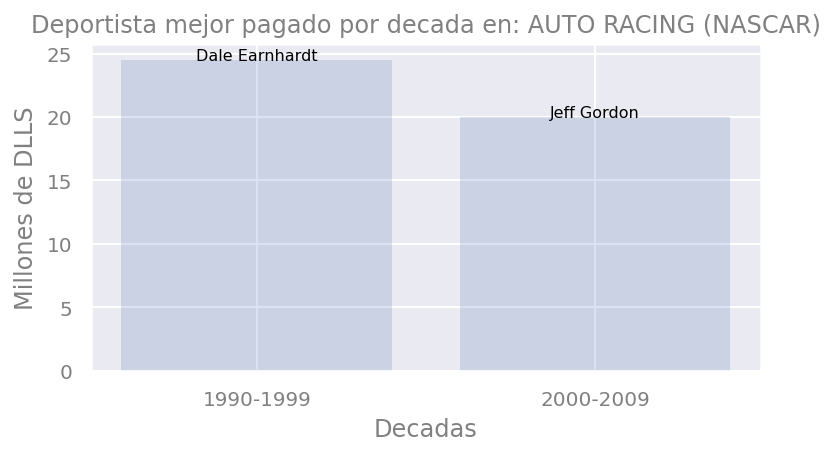

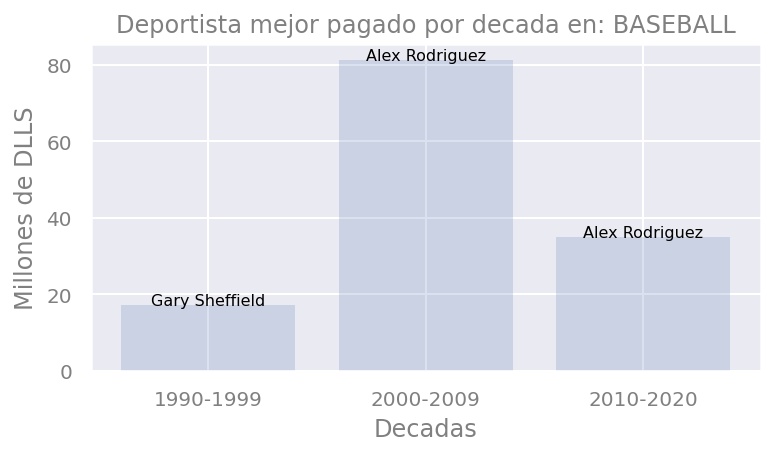

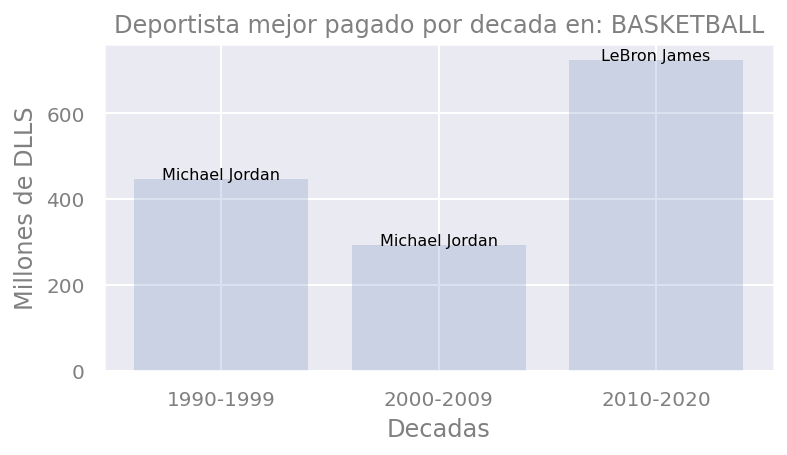

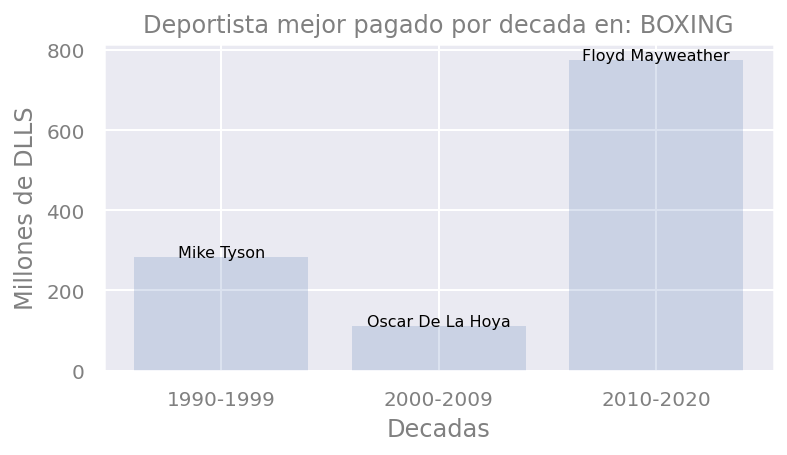

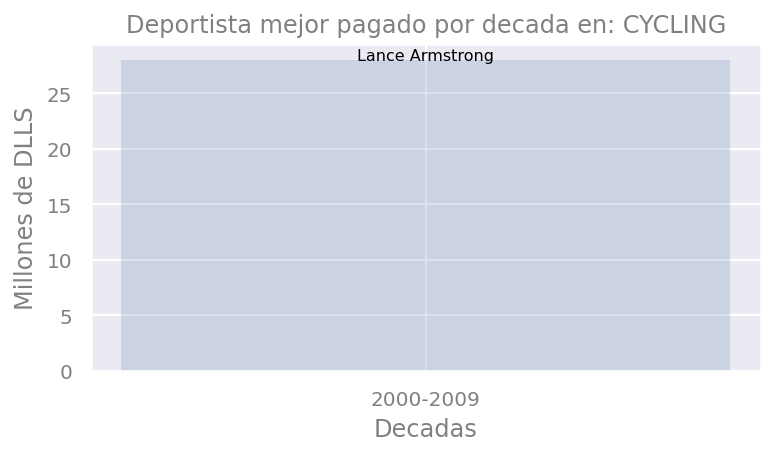

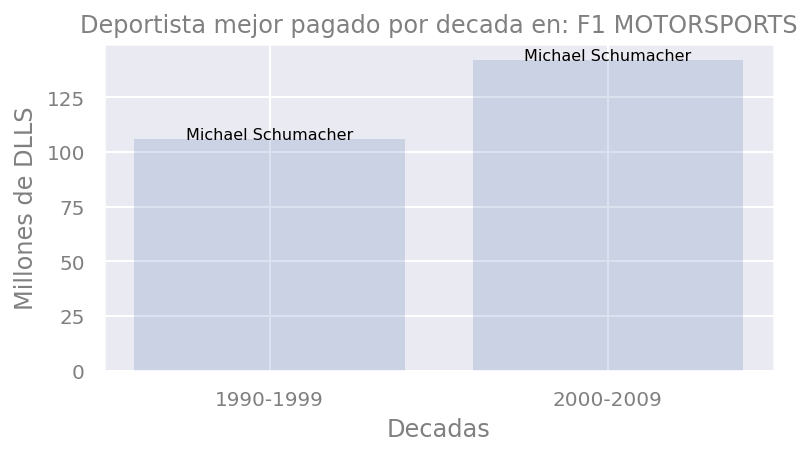

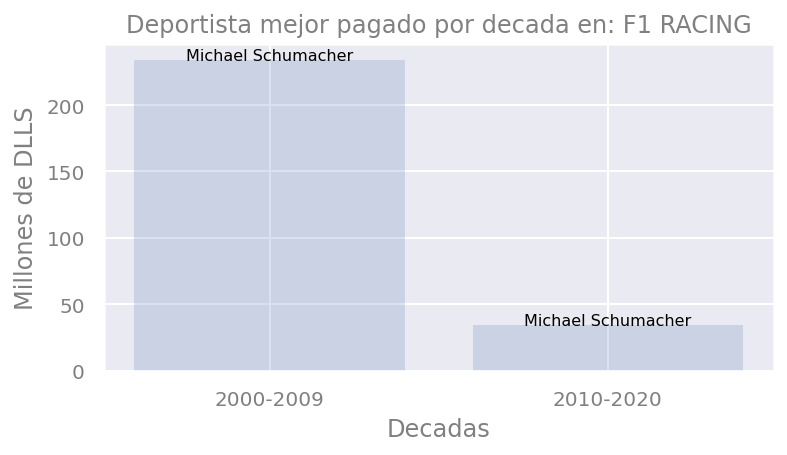

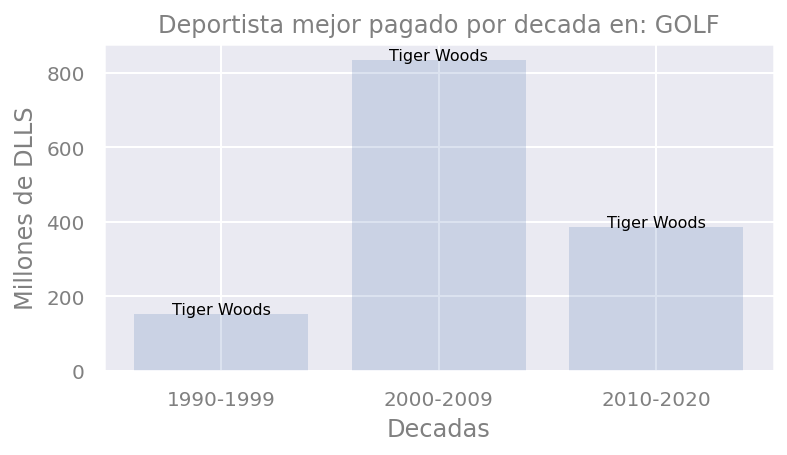

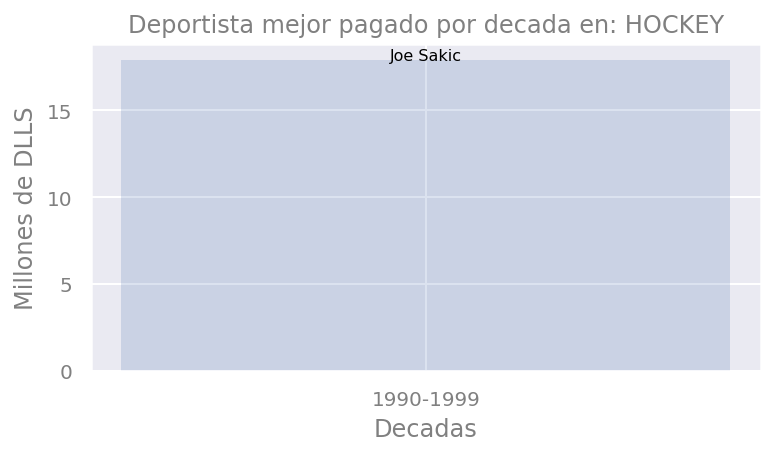

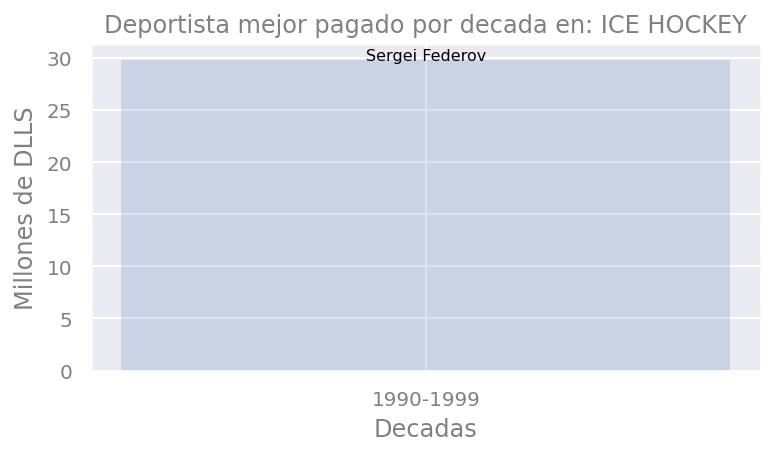

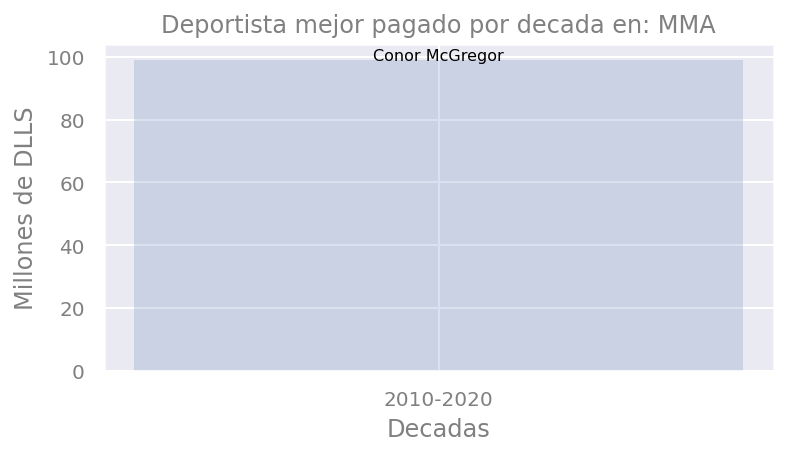

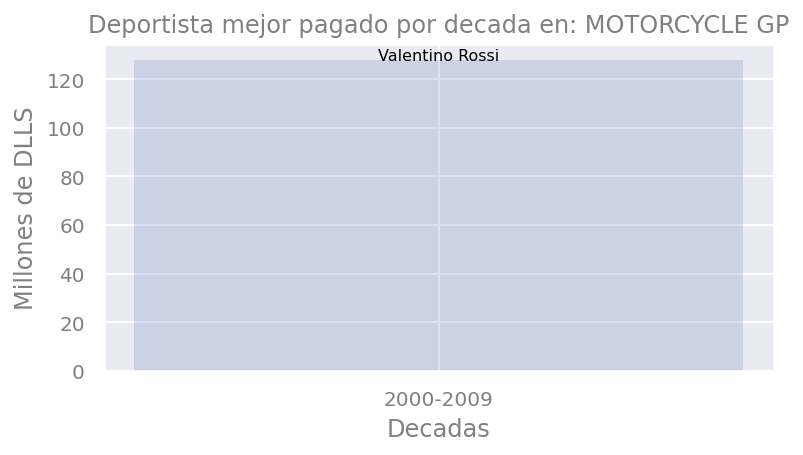

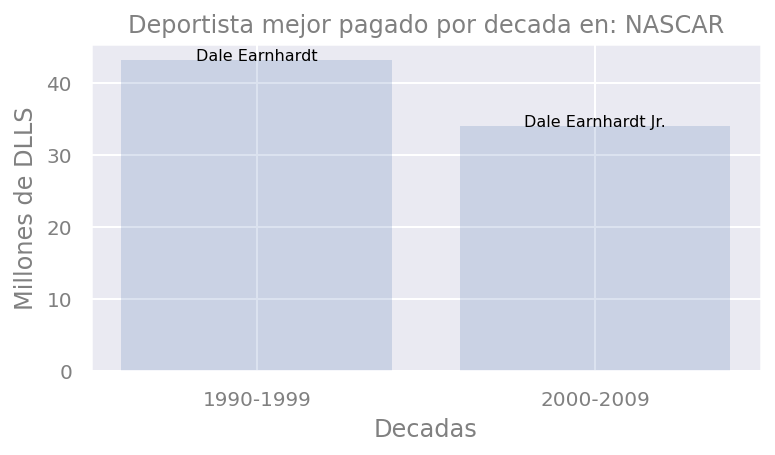

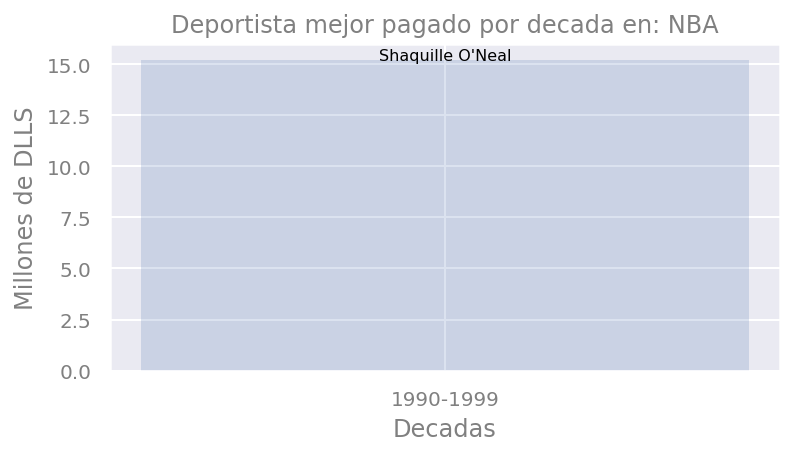

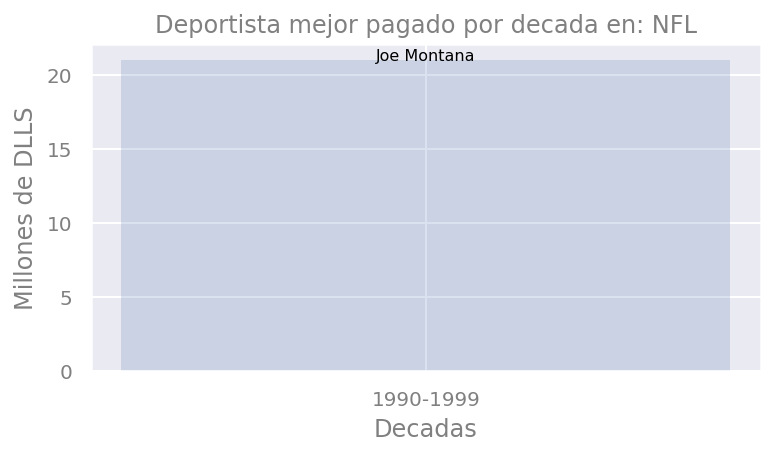

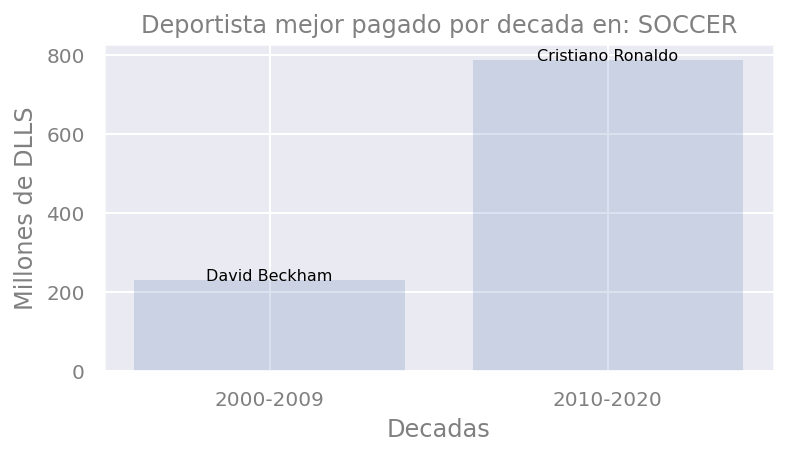

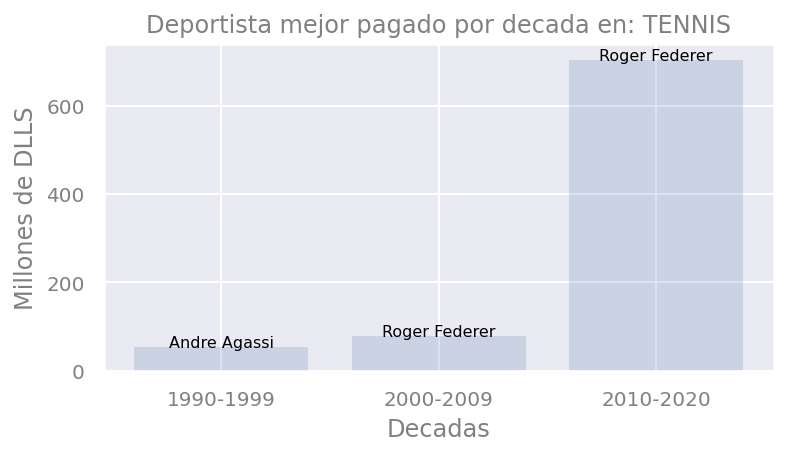

In [ ]:
#creamos los bins
df['Decada'] = pd.cut(x=df['Year'], 
                       bins=[1980,1989,2000,2010,2020,2030], 
                       labels=["1980>","1990-1999","2000-2009","2010-2020","2020-2030"])


#Agrupamos las ganancias por decada, deportista y deporte
df_agrupado=df.groupby(["Name","Sport","Decada"])["earnings ($ million)"].sum().to_frame()
#Quitamos los valores en 0
df_agrupado=df_agrupado[df_agrupado["earnings ($ million)"]>0]
df_agrupado.reset_index(inplace=True)
df_agrupado=df_agrupado.sort_values(["earnings ($ million)","Sport","Name","Decada",], ascending=(False,True, True, True))
df_agrupado.reset_index(inplace=True)

#Obtenemos los valores unicos para decada y deporte
decadas=df_agrupado["Decada"].unique().sort_values(ascending=True).unique()
deportes=df_agrupado["Sport"].sort_values(ascending=True).unique()

#Armamos un data frame con los mejores pagados por decada, deporte y año
best_dude=pd.DataFrame()
for deporte in deportes:
    for decada in decadas:
        #Por cada deporte de cada decada sacamos el deportista mejor pagado y lo agregamos a un dataframe
        best_dude=pd.DataFrame.append((df_agrupado[(df_agrupado["Sport"]==deporte)&(df_agrupado["Decada"]==decada)].sort_values(by=(["earnings ($ million)","Decada"]),ascending=(False,True)).head(1)),other=best_dude)

#Ordenamos el data frame
best_dude=best_dude.sort_values(["Sport","Decada"] , ascending=(True,True))

def grafica_bestDude(datos, deporte):

    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'center')

    fig = plt.figure(figsize =(6, 3))
    bar_plot =plt.bar(datos["Decada"], datos["earnings ($ million)"], align='center', alpha=0.2, edgecolor = "none")
    plt.box(True)

    #Titulos
    plt.title("Deportista mejor pagado por decada en: "+ deporte, color="#808080")
    plt.xlabel("Decadas", color="#808080")
    plt.ylabel("Millones de DLLS", color="#808080")
    
    for ind in datos.index:
        plt.text(datos["Decada"][ind],datos["earnings ($ million)"][ind],datos["Name"][ind], ha = 'center', color="#000000", fontsize=8)

    #Etiquetas
    plt.xticks(fontsize=10, color="#808080")
    plt.yticks(fontsize=10, color="#808080")

    plt.show()
  
for deporte in deportes:
    grafica_bestDude(best_dude[best_dude["Sport"]==deporte],deporte)

## Pregunta 6

Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

Para resolver esta pregunta procedemos utilizando un agrupamiento a partir de las columnas requeridas, en primer lugar por deporte y en segundo lugar por país, de estos agrupamientos obtenemos el máximo y el mínimo de la columna `earnings ($ million)`, en el resultado aparecen las ganancias máximas y mínimas de acuerdo a la función de agregación que se utilice (`max()` o `min()`).

In [ ]:
df.groupby(['Sport','Nationality'],as_index=False)['Name','earnings ($ million)'].max()

Sport       Nationality                     Name  \
0              AMERICAN FOOTBALL               USA                Tom Brady   
1   AMERICAN FOOTBALL / BASEBALL               USA            Deion Sanders   
2                    AUTO RACING           Austria           Gerhard Berger   
3                    AUTO RACING            Brazil             Ayrton Senna   
4                    AUTO RACING            Canada       Jacques Villeneuve   
5                    AUTO RACING            France              Alain Prost   
6                    AUTO RACING           Germany       Michael Schumacher   
7                    AUTO RACING                UK            Nigel Mansell   
8                    AUTO RACING               USA           Dale Earnhardt   
9           AUTO RACING (NASCAR)               USA              Jeff Gordon   
10                      BASEBALL         Dominican           Alex Rodriguez   
11                      BASEBALL               USA           Gary Sheffield   
12                    BASKETBALL               USA            Stephen Curry   
13                        BOXING            Canada  Donovan "Razor" Ruddock   
14                        BOXING          Filipino           Manny Pacquiao   
15                        BOXING            Mexico           Canelo Alvarez   
16                        BOXING       Philippines           Manny Pacquiao   
17                        BOXING               USA        Sugar Ray Leonard   
18                       CYCLING               USA          Lance Armstrong   
19                F1 MOTORSPORTS           Germany       Michael Schumacher   
20                     F1 RACING           Finland           Kimi Raikkonen   
21                     F1 RACING           Germany       Michael Schumacher   
22                          GOLF         Australia              Greg Norman   
23                          GOLF  Northern Ireland             Rory McIlroy   
24                          GOLF               USA              Tiger Woods   
25                        HOCKEY            Canada                Joe Sakic   
26                    ICE HOCKEY            Canada            Wayne Gretzky   
27                    ICE HOCKEY            Russia           Sergei Federov   
28                           MMA           Ireland           Conor McGregor   
29                 MOTORCYCLE GP             Italy          Valentino Rossi   
30                        NASCAR               USA       Dale Earnhardt Jr.   
31                           NBA               USA         Shaquille O'Neal   
32                           NFL               USA              Joe Montana   
33                        SOCCER         Argentina             Lionel Messi   
34                        SOCCER            Brazil               Ronaldinho   
35                        SOCCER          Portugal        Cristiano Ronaldo   
36                        SOCCER                UK            David Beckham   
37                        TENNIS            Serbia           Novak Djokovic   
38                        TENNIS             Spain             Rafael Nadal   
39                        TENNIS       Switzerland            Roger Federer   
40                        TENNIS               USA             Monica Seles   

    earnings ($ million)  
0                   89.5  
1                   22.5  
2                   13.5  
3                   22.0  
4                   23.0  
5                   16.0  
6                   59.0  
7                   46.0  
8                   26.5  
9                   24.5  
10                  35.0  
11                  29.0  
12                  89.0  
13                  10.2  
14                  62.0  
15                  94.0  
16                 160.0  
17                 300.0  
18                  28.0  
19                  75.0  
20                  45.0  
21                  80.0  
22                   8.5  
23                  50.0  
24                 115.0  
25    

## Pregunta 7
Atleta con mayores ganancias por deporte por década 

In [ ]:
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
ganancias_decadas = df.copy()

# Se le asiga el valor a las decadas (10 años)
years = 10

min_year = min(ganancias_decadas['Year'])
max_year = max(ganancias_decadas['Year'])

# Intervalos por decada
decadas = list(range(min_year, max_year + years + 1, years))
intervalo_dec = [[decadas[i], decadas[i+1]-1] for i,_ in enumerate(decadas) if len(decadas)-1 > i]

# Se define el intervalo de decada a partir de los limites por año
def decadas_range(year):
  for intervalo in intervalo_dec:
    if intervalo[0] <= year <= intervalo[1]:
      return str(intervalo[0]) + '-' + str(intervalo[1]) # return the concatenation
  return None

ganancias_decadas['Intervals.Decade'] = ganancias_decadas['Year'].apply(decadas_range)
ganancias_decadas

S.NO               Name Nationality  Current Rank Previous Year Rank  \
0       1         Mike Tyson         USA             1                NaN   
1       2     Buster Douglas         USA             2                NaN   
2       3  Sugar Ray Leonard         USA             3                NaN   
3       4       Ayrton Senna      Brazil             4                NaN   
4       5        Alain Prost      France             5                NaN   
..    ...                ...         ...           ...                ...   
296   297      Stephen Curry         USA             6                  9   
297   298       Kevin Durant         USA             7                 10   
298   299        Tiger Woods         USA             8                 11   
299   300       Kirk Cousins         USA             9               >100   
300   301       Carson Wentz         USA            10               >100   

                 Sport  Year  earnings ($ million) Intervals.Decade  
0               BOXING  1990                  28.6        1990-1999  
1               BOXING  1990                  26.0        1990-1999  
2               BOXING  1990                  13.0        1990-1999  
3          AUTO RACING  1990                  10.0        1990-1999  
4          AUTO RACING  1990                   9.0        1990-1999  
..                 ...   ...                   ...              ...  
296         BASKETBALL  2020                  74.4        2020-2029  
297         BASKETBALL  2020                  63.9        2020-2029  
298               GOLF  2020                  62.3        2020-2029  
299  AMERICAN FOOTBALL  2020                  60.5        2020-2029  
300  AMERICAN FOOTBALL  2020                  59.1        2020-2029  

[301 rows x 9 columns]

In [ ]:
ganancias_decadas.to_csv('file.csv', index = False)

In [ ]:
ganancias_decadas = ganancias_decadas[['Intervals.Decade','Sport','Name','earnings ($ million)']].groupby(['Intervals.Decade','Sport','Name']).sum().reset_index()
top_earnings_decades = ganancias_decadas.groupby(['Intervals.Decade','Sport']).max()
top_earnings_decades

Name  \
Intervals.Decade Sport                                              
1990-1999        AMERICAN FOOTBALL / BASEBALL       Deion Sanders   
                 AUTO RACING                        Nigel Mansell   
                 BASEBALL                          Gary Sheffield   
                 BASKETBALL                      Shaquille O'Neal   
                 BOXING                         Sugar Ray Leonard   
                 F1 MOTORSPORTS                Michael Schumacher   
                 GOLF                                 Tiger Woods   
                 HOCKEY                                 Joe Sakic   
                 ICE HOCKEY                         Wayne Gretzky   
                 NASCAR                            Dale Earnhardt   
                 NBA                             Shaquille O'Neal   
                 NFL                                  Joe Montana   
                 TENNIS                              Monica Seles   
2000-2009        AMERICAN FOOTBALL                      Tom Brady   
                 AUTO RACING                   Michael Schumacher   
                 AUTO RACING (NASCAR)                 Jeff Gordon   
                 BASEBALL                          Alex Rodriguez   
                 BASKETBALL                      Shaquille O'Neal   
                 BOXING                          Oscar De La Hoya   
                 CYCLING                          Lance Armstrong   
                 F1 MOTORSPORTS                Michael Schumacher   
                 F1 RACING                     Michael Schumacher   
                 GOLF                                 Tiger Woods   
                 MOTORCYCLE GP                    Valentino Rossi   
                 NASCAR                        Dale Earnhardt Jr.   
                 SOCCER                                Ronaldinho   
                 TENNIS                             Roger Federer   
2010-2019        AMERICAN FOOTBALL                  Terrell Suggs   
                 AUTO RACING                       Lewis Hamilton   
                 BASEBALL                          Alex Rodriguez   
                 BASKETBALL                         Stephen Curry   
                 BOXING                            Manny Pacquiao   
                 F1 RACING                     Michael Schumacher   
                 GOLF                                 Tiger Woods   
                 MMA                               Conor McGregor   
                 SOCCER                                    Neymar   
                 TENNIS                             Roger Federer   
2020-2029        AMERICAN FOOTBALL                   Kirk Cousins   
                 BASKETBALL                         Stephen Curry   
                 GOLF                                 Tiger Woods   
                 SOCCER                                    Neymar   
                 TENNIS                             Roger Federer   

                                               earnings ($ million)  
Intervals.Decade Sport                                               
1990-1999        AMERICAN FOOTBALL / BASEBALL                  22.5  
                 AUTO RACING                                   64.0  
                 BASEBALL                                      17.2  
                 BASKETBALL                                   409.8  
                 BOXING                                       235.1  
                 F1 MOTORSPORTS                               106.0  
                 GOLF                                          99.9  
                 HOCKEY                                        17.9  
                 ICE HOCKEY                                    29.8  
                 NASCAR                                        43.2  
                 NBA                                           15.2  
                 NFL                                           21.0  
                 TENNIS                     

## Pregunta 8
Ganancia total por cada deporte por cada año.

In [ ]:
# Se copia el dataframe
earning_total_sport_year = df.copy()

# Ganancia total por deporte en cada año
earning_total_sport_year = earning_total_sport_year[['Year','Sport','earnings ($ million)']].groupby(['Year','Sport']).sum()
earning_total_sport_year.columns = ['Total earnings - millions']
earning_total_sport_year

Total earnings - millions
Year Sport                                       
1990 AUTO RACING                             19.0
     BASKETBALL                               8.1
     BOXING                                  75.7
     GOLF                                    25.2
1991 AUTO RACING                             33.0
...                                           ...
2020 AMERICAN FOOTBALL                      119.6
     BASKETBALL                             226.5
     GOLF                                    62.3
     SOCCER                                 304.5
     TENNIS                                 106.3

[176 rows x 1 columns]